#          *Data Analyst jobs visualization*

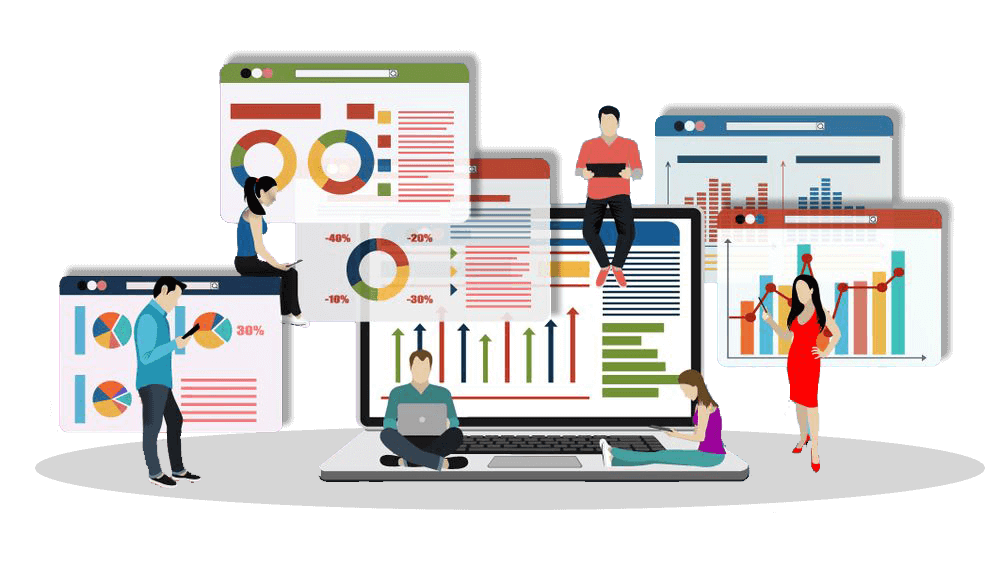

# About Dataset

This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
  and more.


# Import Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


In [39]:
data=pd.read_csv('ICICIBANK.csv')

# Lets explore the data

In [53]:
data.head(20)

Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0   ICICIBANK     EQ       69.20   74.35   74.75   71.40   74.75   74.75   
1   ICICIBANK     EQ       74.75   73.05   78.50   71.00   73.25   73.05   
2   ICICIBANK     EQ       73.05   70.00   73.50   67.50   70.00   69.50   
3   ICICIBANK     EQ       69.50   71.00   74.00   69.55   69.75   70.05   
4   ICICIBANK     EQ       70.05   69.00   72.50   66.00   67.00   67.40   
5   ICICIBANK     EQ       67.40   67.00   71.00   67.00   70.00   69.90   
6   ICICIBANK     EQ       69.90   69.15   70.45   66.10   69.00   69.35   
7   ICICIBANK     EQ       69.35   69.00   74.90   69.00   74.90   74.90   
8   ICICIBANK     EQ       74.90   80.00   80.90   78.00   79.00   79.35   
9   ICICIBANK     EQ       79.35   78.00   80.80   75.00   80.05   79.00   
10  ICICIBANK     EQ       79.00   81.80   85.35   81.80   85.35   85.35   
11  ICICIBANK     EQ       85.35   88.10   88.10   82.00   85.05   84.80   
12  ICICIBANK     EQ       84.80   88.70   91.60   87.00   91.60   91.60   
13  ICICIBANK     EQ       91.60   98.90   98.95   95.00   96.15   96.35   
14  ICICIBANK     EQ       96.35  103.75  103.75   90.65  100.00   99.35   
15  ICICIBANK     EQ       99.35  101.00  107.30  101.00  107.30  107.30   
16  ICICIBANK     EQ      107.30  112.00  115.90  105.90  115.90  115.90   
17  ICICIBANK     EQ      115.90  125.20  125.20  125.15  125.20  125.20   
18  ICICIBANK     EQ      125.20  130.00  135.25  125.20  135.25  135.25   
19  ICICIBANK     EQ      135.25  145.00  146.10  142.80  146.10  146.10   

      VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0    73.20  286260  2.095439e+12     NaN                 NaN          NaN  
1    73.38  296264  2.173893e+12     NaN                 NaN          NaN  
2    70.85  227624  1.612794e+12     NaN                 NaN          NaN  
3    72.04  275149  1.982121e+12     NaN                 NaN          NaN  
4    68.72  138809  9.538882e+11     NaN                 NaN          NaN  
5    69.78  249656  1.742092e+12     NaN                 NaN          NaN  
6    68.89  307601  2.119124e+12     NaN                 NaN          NaN  
7    74.35   88395  6.572220e+11     NaN                 NaN          NaN  
8    80.43  494679  3.978945e+12     NaN                 NaN          NaN  
9    78.15  703072  5.494427e+12     NaN                 NaN          NaN  
10   85.32  242095  2.065495e+12     NaN                 NaN          NaN  
11   84.69  332383  2.814933e+12     NaN                 NaN          NaN  
12   91.29  319504  2.916816e+12     NaN                 NaN          NaN  
13   97.19  562692  5.468978e+12     NaN                 NaN          NaN  
14   97.30  497788  4.843340e+12     NaN                 NaN          NaN  
15  106.59  238959  2.547068e+12     NaN                 NaN          NaN  
16  114.25  377898  4.317395e+12     NaN                 NaN          NaN  
17  125.20   55421  6.938534e+11     NaN                 NaN          NaN  
18  133.89  140552  1.881805e+12     NaN                 NaN          NaN  
19  146.05   48483  7.081001e+11     NaN                 NaN          NaN

**Data includes job title , salary estimation , job description , rating ,company name , location and many more ...**

# Data cleaning 

### Remove the unnamed column

In [54]:
data.drop(['Symbol'],axis=1,inplace=True)

### Check for missing values

In [55]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [56]:
missing_values_table(data)

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
Trades                        2850               53.7
Deliverable Volume             517                9.7
%Deliverble                    517                9.7

In [57]:
data['%Deliverble'].value_counts()

0.5259    7
0.5336    7
0.3794    6
0.4872    6
0.5127    6
         ..
0.4695    1
0.5547    1
0.1796    1
0.6301    1
0.3757    1
Name: %Deliverble, Length: 3052, dtype: int64

In [58]:
data['Trades'].value_counts()

197061.0    2
122655.0    2
90450.0     2
134500.0    2
103381.0    2
           ..
253263.0    1
62396.0     1
112295.0    1
92838.0     1
47616.0     1
Name: Trades, Length: 2440, dtype: int64

In [59]:
data['Volume'].value_counts()[:5]

689289     2
66961      2
404216     2
303829     1
3631828    1
Name: Volume, dtype: int64

As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

Replace -1 or -1.0 or '-1' to NaN

In [60]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [61]:
missing_values_table(data)

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
Trades                        2850               53.7
Deliverable Volume             517                9.7
%Deliverble                    517                9.7

Now you can see there are lots of missing values in the dataset. 'Easy Apply' and 'Competitors' has maximum number of missing values (> 50%)

Most companies has null values in easy apply because they are not hiring .

In [3]:
data['Trades'],_=data['Trades'].str.split('\n',1).str

NameError: name 'data' is not defined

In [ ]:
data['Symbol'],data['Department']=data['Symbol'].str.split(',', 1).str

In [2]:
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

NameError: name 'data' is not defined

#### Split salary into two columns min salary and max salary.

In [ ]:
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [ ]:
data.drop(['Salary Estimate'],axis=1,inplace=True)

# Current openings 

In [ ]:
data['Easy Apply']=data['Easy Apply'].fillna(False).astype('bool')

In [ ]:
df_easy_apply=data[data['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=company_opening_df,
    x='Company Name',
    y='Easy Apply',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 

)

**These are the top 10 companies hiring for Data analyst roles**

# Salary Distribution of Data Analyst

In [16]:
data_analyst = data[data['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

#Plot a histogram and kernel density estimate

sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])

sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

KeyError: 'Job Title'

# Top 20 cities with their minimum and maximum salaries 

In [17]:
df=data.groupby('Location')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

KeyError: 'Location'

In [18]:

fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

fig.show()

NameError: name 'df' is not defined

# Top 20 Roles with their minimum and maximum salaries

In [ ]:
df=data.groupby('Job Title')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 Roles with their minimum and maximum salaries',barmode='stack')

fig.show()

NameError: name 'df' is not defined

# Size of Employees Vs No of Companies

In [20]:
df=data['Size'].value_counts()

KeyError: 'Size'

In [21]:
df=pd.DataFrame(df)
df['employee_size']=df.index

NameError: name 'df' is not defined

In [22]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

NameError: name 'df' is not defined

In [23]:
df=df.rename(columns={"Size": "No_of_companies"})

NameError: name 'df' is not defined

In [24]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='employee_size',
    y='No_of_companies',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

NameError: name 'df' is not defined

<Figure size 720x360 with 0 Axes>

**maximum companies having size 1-200 or 5000**

# Revenue of different sectors

In [ ]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue
        

In [ ]:
data['Max_revenue']=data['Revenue'].apply(lambda x: filter_revenue(x))

In [ ]:
df=data.groupby('Sector')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Sector',
    y='Max_revenue'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")


As you can see from the graph **highest revenue** is from **Art,Entertainment and recreation**

# Revenue of different Industries

In [ ]:
df=data.groupby('Industry')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Industry',
    y='Max_revenue',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")

# Word Cloud of job Title

In [ ]:
job_title=data['Job Title'][~pd.isnull(data['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

# Ratings 

In [ ]:
count=data.groupby('Rating')['Company Name'].count()

In [ ]:
df=pd.DataFrame(count).rename(columns={'Company Name': 'Count'}).reset_index()

In [ ]:
df=df.sort_values('Rating',ascending=False).head(20)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Rating',
    y='Count',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("No. of companies")

# Industries with their Average minimum and maximum salaries

In [ ]:
df=data.groupby('Industry')[['Min_Salary','Max_Salary']].mean().rename(columns={'Min_Salary':'Avg_min_salary','Max_Salary':'Avg_max_salary'})

In [ ]:
df=df.reset_index()

In [ ]:
df=df.sort_values(['Avg_max_salary','Avg_max_salary'],ascending=False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.Industry,y=df['Avg_min_salary'],name='Average Minimum salary'))
fig.add_trace(go.Bar(x=df.Industry,y=df['Avg_max_salary'],name='Average Maximum Salary'))

fig.update_layout(title='Industries with their Average minimum and maximum salaries',barmode='stack')

fig.show()

# Jobs with Openings

In [ ]:
df=pd.DataFrame(data[data['Easy Apply']==True]['Job Title'].value_counts()).rename(columns={'Job Title':'No_of_openings'})

In [ ]:
df=df.reset_index().rename(columns={'index':'Job Title'})

In [ ]:
df=df.head(10)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Job Title',
    y='No_of_openings',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)


# If you like my work do UPVOTE 